In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("unemployment in india.csv")

df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

print("Columns in dataset:", df.columns)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())


Columns in dataset: Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

First 5 rows:
            Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                     

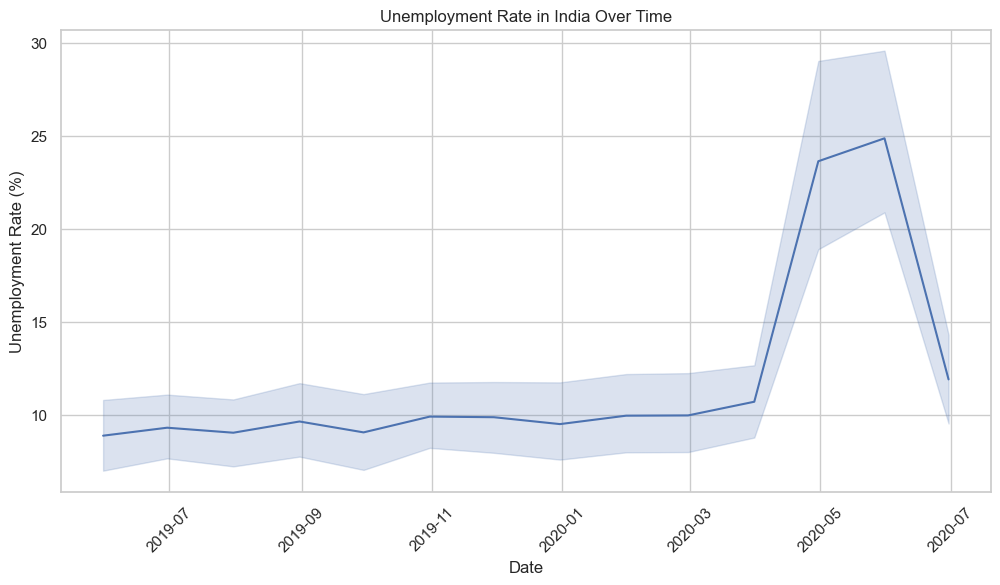

In [2]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()


C:\Users\gokul\AppData\Local\Temp\ipykernel_21740\1056847582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, palette="viridis")


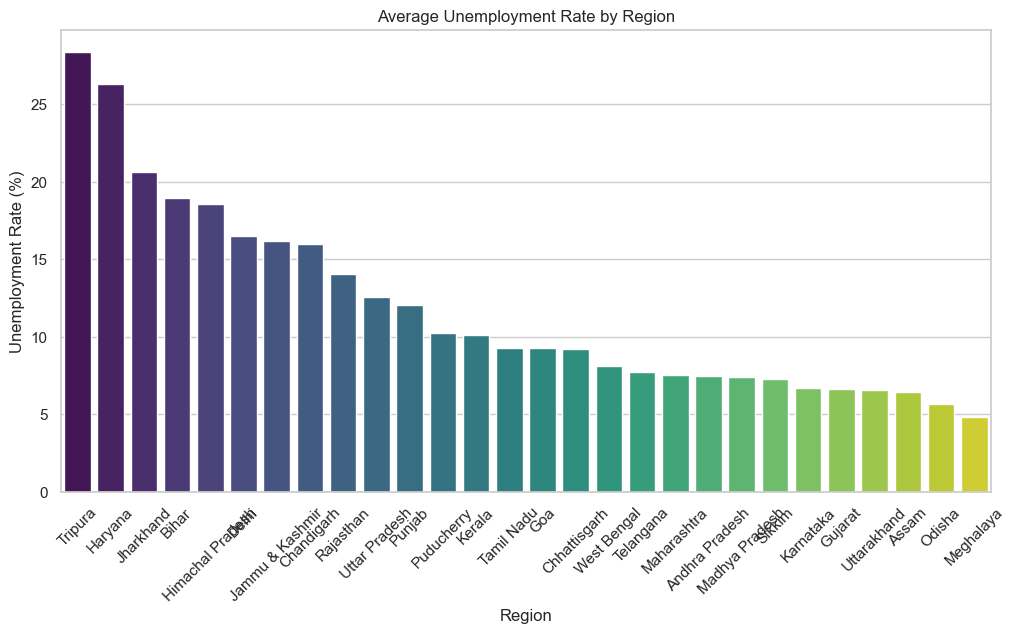

In [3]:
plt.figure(figsize=(12,6))
region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.index, y=region_avg.values, palette="viridis")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()


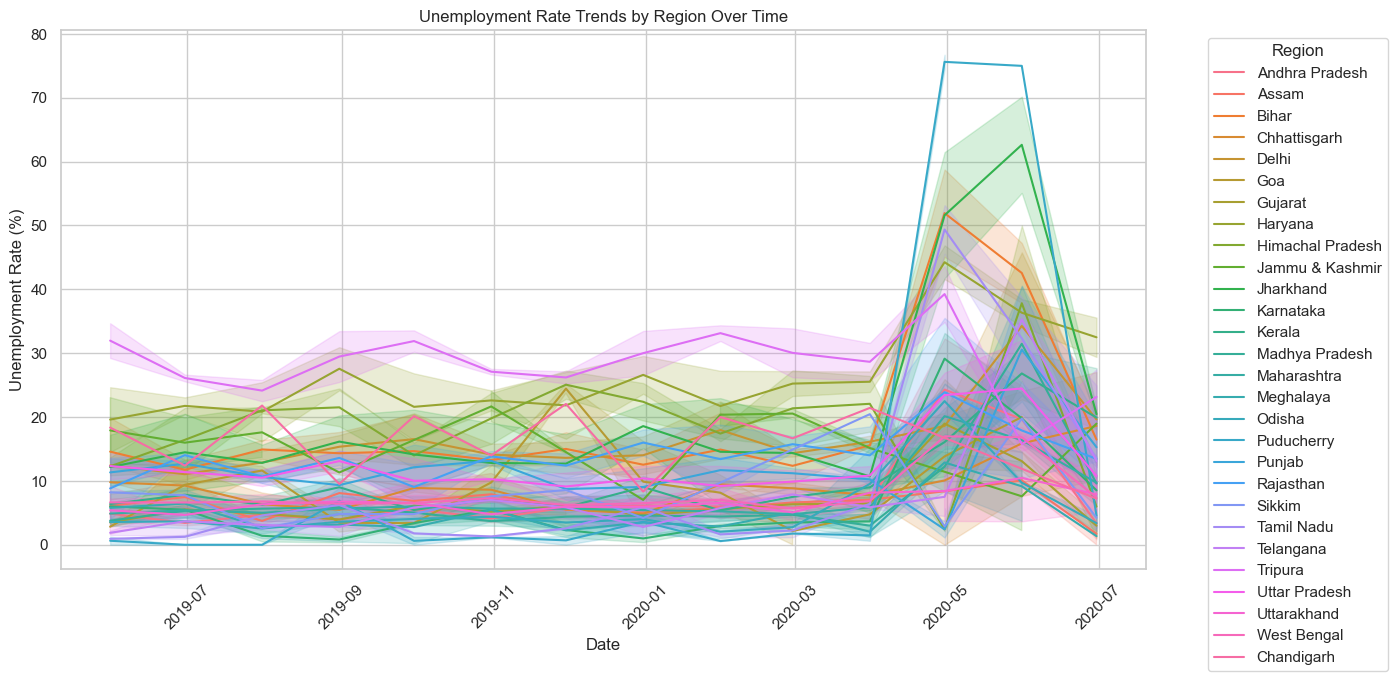

In [4]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title("Unemployment Rate Trends by Region Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


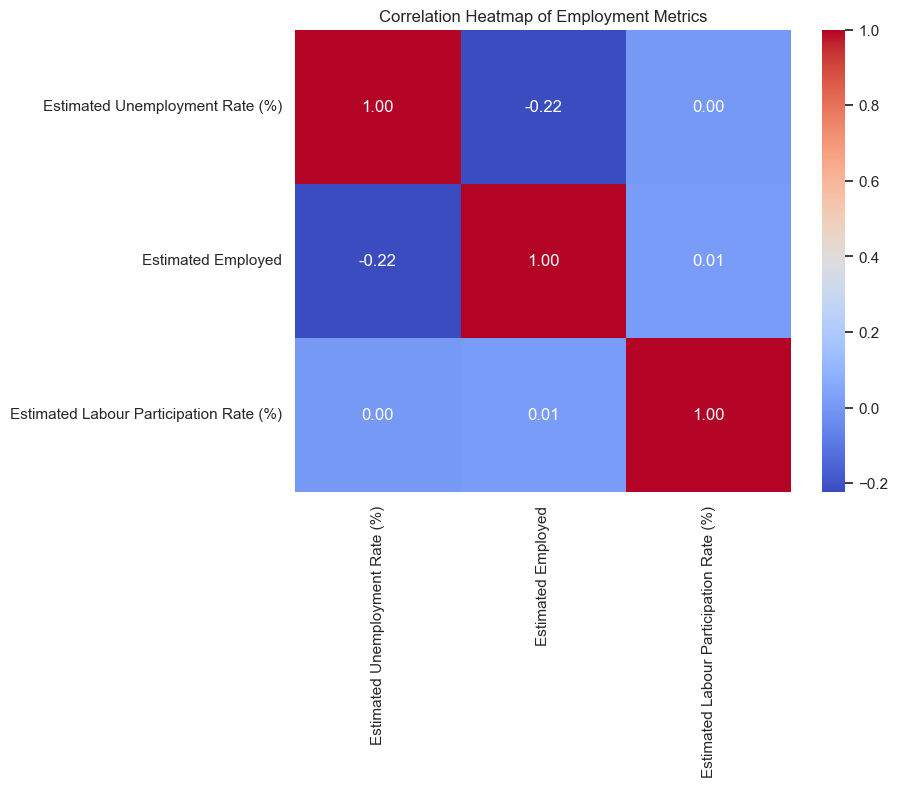

In [5]:
# Select only numerical columns for correlation
num_cols = ['Estimated Unemployment Rate (%)',
            'Estimated Employed',
            'Estimated Labour Participation Rate (%)']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Employment Metrics")
plt.show()



- The unemployment rate fluctuates significantly across regions.  
- Some regions consistently show higher unemployment than others.  
- The correlation heatmap suggests that:
  - Unemployment rate is **negatively correlated** with employment.  
  - Labour participation rate has a mixed relationship depending on region.  
- Overall, unemployment showed notable variation over time, highlighting regional disparities in job opportunities.
